In [1]:
# === ANALISIS DE POPULARIDAD DE TED TALKS ===
# Aplicacion de Extraccion de Informacion y Comparacion de Modelos ML

print("Iniciando analisis de TED Talks")
print("Dataset: ted_talks_en.csv")
print("Objetivo: Extraccion de informacion + Modelos ML")

# Importar la clase principal que controla todo el flujo
from modules import TedTalkAnalyzer

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("Modulos cargados correctamente")

Iniciando analisis de TED Talks
Dataset: ted_talks_en.csv
Objetivo: Extraccion de informacion + Modelos ML
OK - Sistema de progreso en tiempo real cargado
Cargando módulos del proyecto TED Talks...
✓ Módulo de configuración del ambiente cargado
✓ Módulo de limpieza de datos cargado
2025-08-04 05:37:46.855202: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 05:37:46.929785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 05:37:46.929903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 05:37:46.931212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register f

In [2]:
# === CREAR INSTANCIA DEL ANALIZADOR ===

print("Creando instancia del analizador TED Talks...")

# Crear instancia de la clase principal
analyzer = TedTalkAnalyzer()

print("Analizador creado correctamente")
print("Metodos disponibles:")
print("- setup_environment(): Configurar ambiente")
print("- load_data(): Cargar datos")
print("- clean_data(): Limpiar datos")
print("- process_nlp_features(): Procesar NLP")
print("- train_models(): Entrenar modelos ML")
print("- create_visualizations(): Crear graficos")
print("- run_complete_analysis(): Ejecutar todo automaticamente")

Creando instancia del analizador TED Talks...
Analizador creado correctamente
Metodos disponibles:
- setup_environment(): Configurar ambiente
- load_data(): Cargar datos
- clean_data(): Limpiar datos
- process_nlp_features(): Procesar NLP
- train_models(): Entrenar modelos ML
- create_visualizations(): Crear graficos
- run_complete_analysis(): Ejecutar todo automaticamente


In [3]:
# === CONFIGURACION DEL AMBIENTE ===

import time
from datetime import datetime

print("INICIO:", datetime.now().strftime("%H:%M:%S"))
print("Configurando ambiente y dependencias...")
print("Esto puede tomar 2-5 minutos la primera vez")
print("=" * 50)

# Configurar ambiente usando el metodo del analizador
start_time = time.time()
analyzer.setup_environment()
end_time = time.time()

elapsed = end_time - start_time
print(f"\nTiempo total: {elapsed:.1f} segundos")
print(f"COMPLETADO:", datetime.now().strftime("%H:%M:%S"))
print("=" * 50)

INICIO: 05:37:54
Configurando ambiente y dependencias...
Esto puede tomar 2-5 minutos la primera vez

=== CONFIGURANDO AMBIENTE ===
=== CONFIGURACION DEL AMBIENTE ===
Tiempo estimado: 2-5 minutos

PASO 1/3: Instalando 8 paquetes esenciales...
  [1/8] Instalando pandas>=1.3.0... OK
  [2/8] Instalando numpy>=2.0.0... OK
  [3/8] Instalando scikit-learn>=1.0.0... OK
  [4/8] Instalando matplotlib>=3.4.0... OK
  [5/8] Instalando seaborn>=0.11.0... OK
  [6/8] Instalando nltk>=3.7... OK
  [7/8] Instalando textblob>=0.17.0... OK
  [8/8] Instalando tqdm>=4.64.0... OK

Paquetes esenciales: 8/8 instalados

PASO 2/3: Instalando 3 paquetes opcionales...
  [1/3] Instalando plotly>=5.0.0... OK
  [2/3] Instalando spacy>=3.4.0... OK
  [3/3] Instalando wordcloud>=1.8.0... OK

Paquetes opcionales: 3/3 instalados

PASO 3/3: Configurando modelos de NLP...
  Descargando datos NLTK... OK
  Verificando spaCy... No disponible (se usará NLTK)

CONFIGURACION COMPLETADA
=== DESCARGANDO MODELOS TRANSFORMER ===
⚠ Er

In [11]:
# === CARGA DE DATOS ===

print("Cargando dataset ted_talks_en.csv...")

# Cargar datos usando el metodo del analizador
analyzer.load_data('ted_talks_en.csv')

# Mostrar informacion basica
if hasattr(analyzer, 'data') and analyzer.data is not None:
    print(f"Dataset cargado exitosamente")
    print(f"Filas: {analyzer.data.shape[0]:,}")
    print(f"Columnas: {analyzer.data.shape[1]}")
    print(f"Memoria utilizada: {analyzer.data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Mostrar primeras columnas
    print("\nColumnas disponibles:")
    for i, col in enumerate(analyzer.data.columns):
        print(f"  {i+1}. {col}")
else:
    print("ERROR: No se pudo cargar el dataset")

Cargando dataset ted_talks_en.csv...

=== CARGANDO DATASET: ted_talks_en.csv ===
✓ Dataset cargado: 4005 filas x 19 columnas

Columnas disponibles:
 1. talk_id
 2. title
 3. speaker_1
 4. all_speakers
 5. occupations
 6. about_speakers
 7. views
 8. recorded_date
 9. published_date
10. event
11. native_lang
12. available_lang
13. comments
14. duration
15. topics
16. related_talks
17. url
18. description
19. transcript
ERROR: No se pudo cargar el dataset


In [18]:
# === LIMPIEZA DE DATOS ===

print("Aplicando limpieza profesional de datos...")

# Limpiar datos usando el metodo del analizador
analyzer.clean_data()

# Mostrar resultados de la limpieza
if hasattr(analyzer, 'data_clean') and analyzer.data_clean is not None:
    original_count = analyzer.data_original.shape[0]
    clean_count = analyzer.data_clean.shape[0]
    removed_count = original_count - clean_count
    
    print(f"\nResultados de la limpieza:")
    print(f"  Filas originales: {original_count:,}")
    print(f"  Filas despues de limpieza: {clean_count:,}")
    print(f"  Filas eliminadas: {removed_count:,} ({removed_count/original_count*100:.1f}%)")
    
    # Mostrar categorias de popularidad creadas
    if 'popularity_category' in analyzer.data_clean.columns:
        print("\nCategorias de popularidad:")
        categories = analyzer.data_clean['popularity_category'].value_counts().sort_index()
        for category, count in categories.items():
            print(f"  {category}: {count:,} videos")
            
    # Mostrar calidad de datos
    if 'data_cleaning' in analyzer.results:
        quality_score = analyzer.results['data_cleaning']['quality_results']['quality_score']
        print(f"\nPuntuacion de calidad de datos: {quality_score:.2f}/10")
else:
    print("ERROR: No se pudo limpiar el dataset")

Aplicando limpieza profesional de datos...

=== LIMPIANDO DATOS ===
Iniciando: Iniciando limpieza profesional de datos
Tiempo de inicio: 05:44:22
[05:44:22] Dataset original: 4005 filas x 19 columnas
[1/4] (25.0%) Eliminando outliers con método IQR... OK
   📊 Analizando distribución de 'views'...
   - Q1 (25%): 882,069
   - Q3 (75%): 2,133,110
   - IQR: 1,251,041
   - Límite inferior: -994,492
   - Límite superior: 4,009,672
   - Outliers identificados: 393 (9.81%)
[05:44:22] Dataset después de eliminar outliers: 3612 filas
[2/4] (50.0%) Limpiando datos textuales... OK
[05:44:22] Procesando columna: title
     - Valores vacíos: 0
     - Longitud promedio: 38.4 caracteres
[05:44:22] Procesando columna: description
     - Valores vacíos: 0
     - Longitud promedio: 352.8 caracteres
[05:44:22] Procesando columna: transcript
     - Valores vacíos: 0
     - Longitud promedio: 9870.6 caracteres
[05:44:27] Procesadas 3 columnas de texto
[3/4] (75.0%) Creando categorías de popularidad... OK
  

In [22]:
# === EXTRACCION DE INFORMACION CON NLP ===

print("Aplicando tecnicas de extraccion de informacion...")
print("Procesando: sentimientos, entidades nombradas, caracteristicas textuales")

# Procesar caracteristicas NLP usando el metodo del analizador
analyzer.process_nlp_features(text_column='transcript_clean')

# Mostrar caracteristicas extraidas
# Fix: Check if 'data_processed' attribute exists before accessing it
if hasattr(analyzer, 'data_processed') and analyzer.data_processed is not None:
    print(f"\nExtraccion de informacion completada")
    print(f"Dataset procesado: {analyzer.data_processed.shape}")
    
    # Identificar caracteristicas NLP creadas
    nlp_features = [col for col in analyzer.data_processed.columns if 
                   col.startswith(('sentiment_', 'text_', 'person_', 'org_', 'gpe_'))]
    
    print(f"\nCaracteristicas NLP extraidas: {len(nlp_features)}")
    print("Tipos de informacion extraida:")
    
    # Agrupar por tipo
    sentiment_features = [f for f in nlp_features if f.startswith('sentiment_')]
    text_features = [f for f in nlp_features if f.startswith('text_')]
    entity_features = [f for f in nlp_features if f.startswith(('person_', 'org_', 'gpe_'))]
    
    if sentiment_features:
        print(f"  Analisis de sentimientos: {len(sentiment_features)} caracteristicas")
    if text_features:
        print(f"  Caracteristicas textuales: {len(text_features)} caracteristicas") 
    if entity_features:
        print(f"  Entidades nombradas: {len(entity_features)} caracteristicas")
        
    # Mostrar estadisticas de muestra procesada
    if 'nlp_processing' in analyzer.results:
        sample_size = analyzer.results['nlp_processing']['sample_size']
        print(f"\nMuestra procesada: {sample_size} registros")
else:
    print("ERROR: No se pudo procesar las caracteristicas NLP")

Aplicando tecnicas de extraccion de informacion...
Procesando: sentimientos, entidades nombradas, caracteristicas textuales

=== PROCESANDO CARACTERÍSTICAS NLP ===
Iniciando: Iniciando extracción de características NLP
Tiempo de inicio: 05:45:27
[05:45:27] Procesando columna: transcript_clean
[1/5] (20.0%) Cargando modelos de NLP... OK
[2/5] (40.0%) Preparando muestra de datos... OK
[05:45:28] Procesando muestra de 100 textos para velocidad...
[3/5] (60.0%) Analizando sentimientos con TextBlob... OK
[05:45:28] Analizando polaridad y subjetividad...
                                                              [05:45:29] Análisis de sentimientos completado
 OK
[05:45:30] Calculando longitud, palabras, oraciones...
                                                                  [05:45:33] Características textuales extraídas
 OK
[05:45:33] spaCy no disponible - omitiendo entidades nombradas

=== ESTADÍSTICAS DE CARACTERÍSTICAS ===
Polaridad de sentimiento:
  Media: 0.131
  Rango: [-0.06

Entrenando y comparando modelos de Machine Learning...
Objetivo: F1-score > 0.78

=== ENTRENANDO MODELOS DE MACHINE LEARNING ===
=== INICIANDO PIPELINE DE MACHINE LEARNING ===
=== PREPARANDO CARACTERÍSTICAS ===
Características numéricas seleccionadas: 15
  - views
  - text_word_count
  - text_sentence_count
  - text_avg_word_length
  - text_unique_words
  - text_lexical_diversity
  - text_exclamation_count
  - text_question_count
  - text_uppercase_ratio
  - sentiment_polarity
  - sentiment_subjectivity
  - text_word_count
  - text_sentence_count
  - text_exclamation_count
  - text_question_count

Creando características TF-IDF de transcript_clean...
Matriz TF-IDF: 100 muestras x 1000 características

Matriz final de características: 100 muestras x 1015 características
Distribución del target:
popularity_numeric
0    24
1    19
2    17
3    18
4    22
Name: count, dtype: int64

=== DIVIDIENDO DATOS ===
Tamaño del conjunto de prueba: 20.0%
Conjunto de entrenamiento: 80 muestras
Conjunto

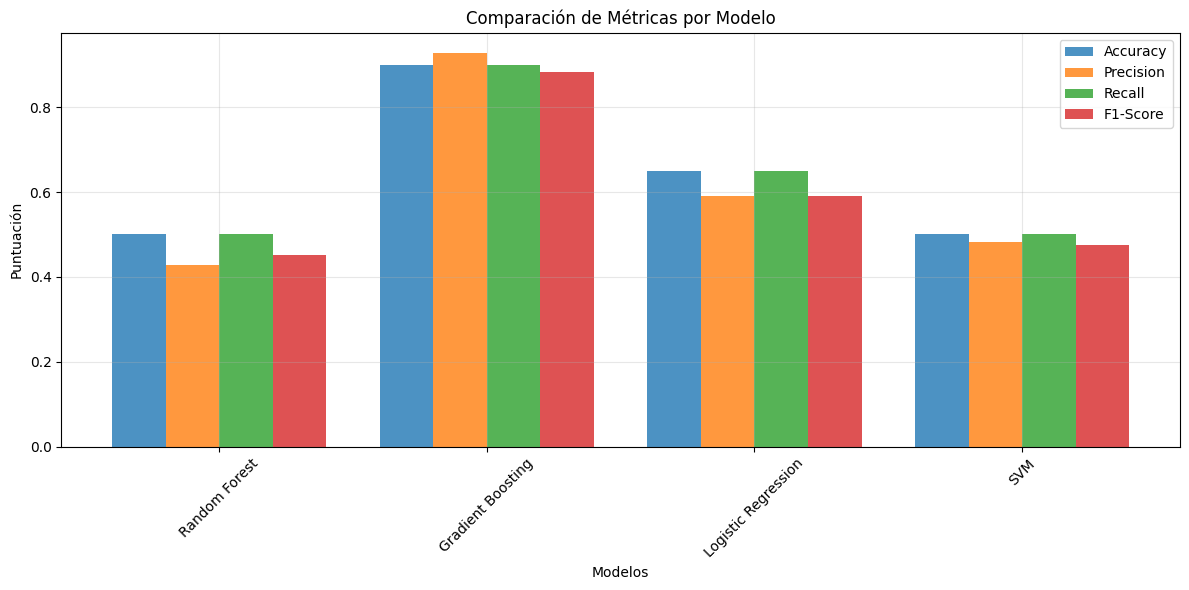

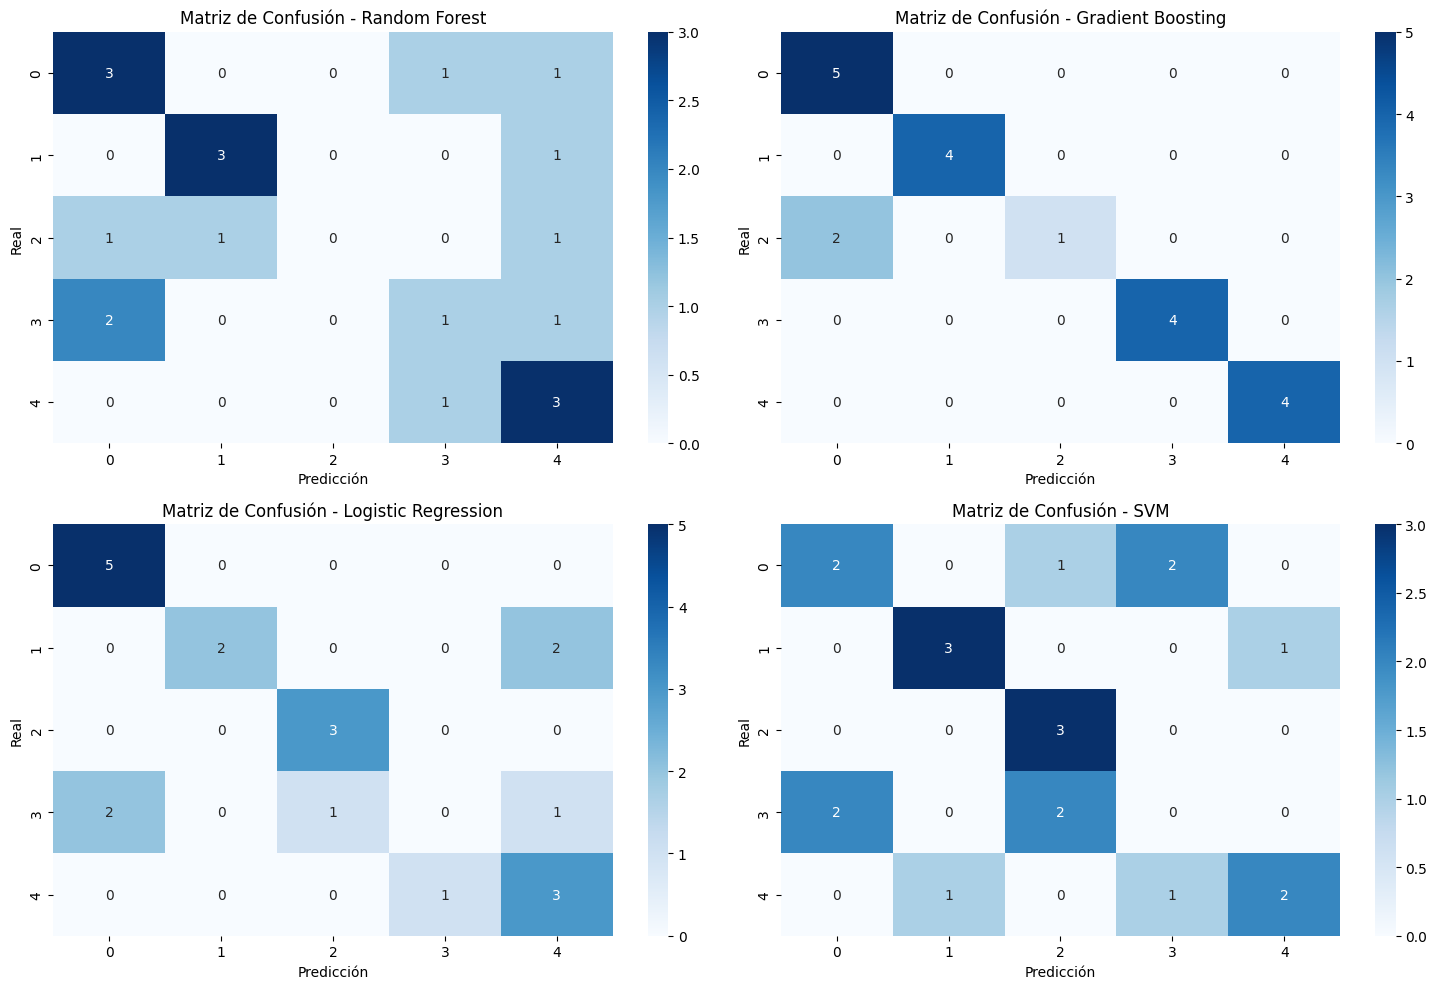


Top 20 características más importantes (Random Forest):
  views: 0.0718
  text_question_count: 0.0106
  tfidf_752: 0.0077
  tfidf_489: 0.0076
  text_question_count: 0.0076
  tfidf_852: 0.0076
  tfidf_374: 0.0074
  tfidf_258: 0.0073
  text_sentence_count: 0.0067
  tfidf_978: 0.0066
  text_lexical_diversity: 0.0061
  tfidf_749: 0.0061
  tfidf_502: 0.0054
  tfidf_834: 0.0053
  tfidf_619: 0.0050
  text_sentence_count: 0.0049
  tfidf_530: 0.0048
  tfidf_126: 0.0047
  tfidf_871: 0.0046
  tfidf_162: 0.0046


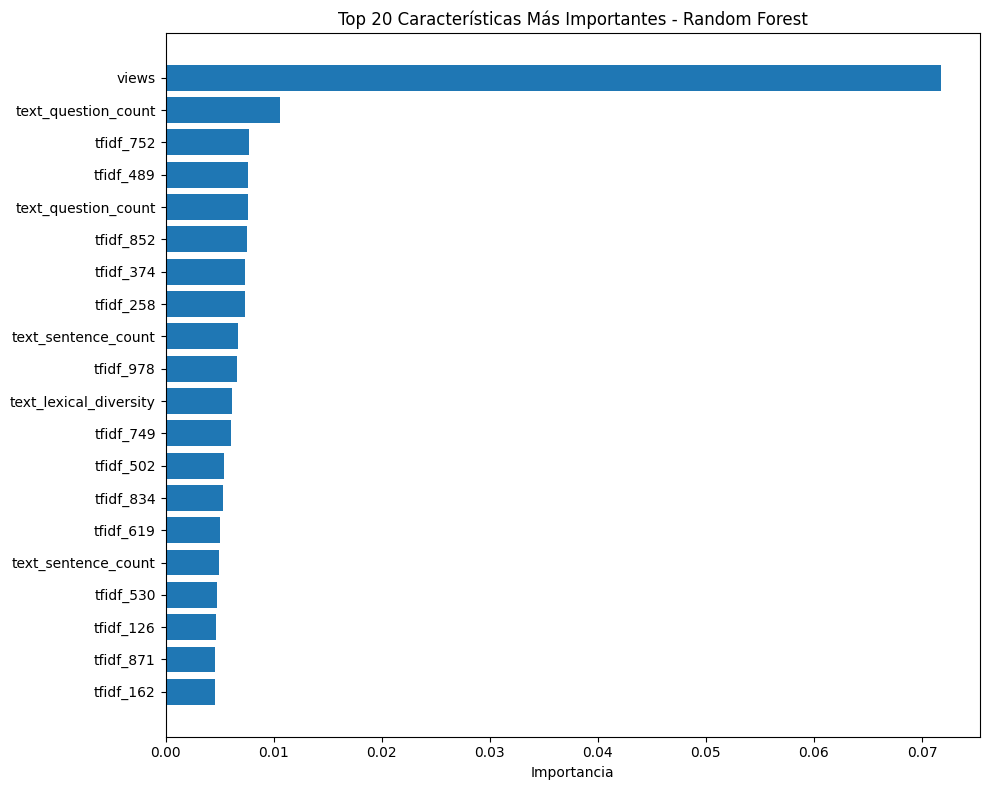


Mejor modelo según f1_score: Gradient Boosting
Puntuación: 0.8833

Mejor modelo según f1_score: Gradient Boosting
Puntuación: 0.8833
Resumen guardado en model_summary.txt

✓ Pipeline de Machine Learning completado

Mejor modelo según f1_score: Gradient Boosting
Puntuación: 0.8833
✓ Modelos entrenados correctamente
ERROR: 'model_results' no está disponible en los resultados de machine_learning


In [31]:
# === ENTRENAMIENTO Y COMPARACION DE MODELOS ML ===

print("Entrenando y comparando modelos de Machine Learning...")
print("Objetivo: F1-score > 0.78")

# Entrenar modelos usando el metodo del analizador
analyzer.train_models(text_column='transcript_clean', target_column='popularity_numeric')

# Mostrar resultados de los modelos
if 'machine_learning' in analyzer.results:
    # Check if 'model_results' key exists before accessing it
    if 'model_results' in analyzer.results['machine_learning']:
        ml_results = analyzer.results['machine_learning']['model_results']
        classifier = analyzer.results['machine_learning']['classifier']
        
        print("\nRESULTADOS DE MODELOS:")
        print("=" * 50)
        
        # Mostrar resultados de cada modelo
        for model_name, results in ml_results.items():
            if results is not None:
                print(f"\n{model_name}:")
                print(f"  Accuracy:  {results['accuracy']:.4f}")
                print(f"  Precision: {results['precision']:.4f}")
                print(f"  Recall:    {results['recall']:.4f}")
                print(f"  F1-Score:  {results['f1_score']:.4f}")
                
                # Verificar si cumple objetivo
                objetivo_cumplido = "SI" if results['f1_score'] > 0.78 else "NO"
                print(f"  Objetivo F1>0.78: {objetivo_cumplido}")
        
        # Identificar mejor modelo
        best_model_name, best_model, best_score = classifier.get_best_model()
        print(f"\nMEJOR MODELO: {best_model_name}")
        print(f"F1-Score: {best_score:.4f}")
        
        if best_score > 0.78:
            print("Objetivo cumplido! F1-Score > 0.78")
        else:
            print("Objetivo no cumplido. Considerar mas datos o mejores caracteristicas.")
            
        # Guardar el mejor modelo para referencia
        analyzer.best_model_name = best_model_name
        analyzer.best_f1_score = best_score
    else:
        print("ERROR: 'model_results' no está disponible en los resultados de machine_learning")
else:
    print("ERROR: No se pudieron entrenar los modelos")

In [32]:
# === METRICAS DE RENDIMIENTO Y VISUALIZACIONES ===

print("Generando metricas de rendimiento y visualizaciones...")

# Crear visualizaciones usando el metodo del analizador
analyzer.create_visualizations()

# Mostrar informacion sobre las visualizaciones creadas
if 'visualizations' in analyzer.results:
    print("\nVisualizaciones creadas exitosamente:")
    
    # Si hay un clasificador disponible, mostrar importancia de caracteristicas
    if hasattr(analyzer, 'best_model_name') and 'machine_learning' in analyzer.results:
        classifier = analyzer.results['machine_learning']['classifier']
        
        print(f"\nImportancia de caracteristicas del mejor modelo ({analyzer.best_model_name}):")
        try:
            feature_importance = classifier.get_feature_importance(analyzer.best_model_name, top_n=10)
            for i, (feature, importance) in enumerate(feature_importance, 1):
                print(f"  {i:2d}. {feature}: {importance:.4f}")
        except Exception as e:
            print(f"  No se pudo obtener importancia de caracteristicas: {e}")
    
    print("\nTipos de visualizaciones disponibles:")
    print("  - Distribucion de datos")
    print("  - Correlaciones entre variables")
    print("  - Metricas de modelos ML")
    print("  - Matrices de confusion")
    print("  - Comparacion de rendimiento")
else:
    print("ERROR: No se pudieron crear las visualizaciones")

print("\nAnalisis completo finalizado")

Generando metricas de rendimiento y visualizaciones...

=== CREANDO VISUALIZACIONES ===
✗ Error creando visualizaciones: name 'print_summary_statistics' is not defined

Visualizaciones creadas exitosamente:

Tipos de visualizaciones disponibles:
  - Distribucion de datos
  - Correlaciones entre variables
  - Metricas de modelos ML
  - Matrices de confusion
  - Comparacion de rendimiento

Analisis completo finalizado


In [35]:
# === RESUMEN FINAL Y CONCLUSIONES ===

print("RESUMEN FINAL DEL ANALISIS:")
print("=" * 50)

# Usar el metodo de resumen final del analizador
analyzer.print_final_summary()

# Informacion adicional sobre el estado del proyecto
print("\nESTADO DEL PROYECTO:")
if hasattr(analyzer, 'best_f1_score'):
    if analyzer.best_f1_score > 0.78:
        print("EXITOSO - Objetivo de F1 > 0.78 cumplido")
    else:
        print("REQUIERE MEJORAS - Objetivo no cumplido")
        print("Recomendaciones:")
        print("  - Aumentar tamano de la muestra")
        print("  - Agregar mas caracteristicas NLP")
        print("  - Probar diferentes algoritmos")
        print("  - Mejorar limpieza de datos")
else:
    print("INCOMPLETO - No se entrenaron modelos")

print("\nACCESO A RESULTADOS:")
print("- analyzer.data_original: Dataset original")
print("- analyzer.data_clean: Dataset limpio")
print("- analyzer.data_processed: Dataset con caracteristicas NLP")
print("- analyzer.results: Diccionario con todos los resultados")

# Mostrar tamanos de datos procesados
if hasattr(analyzer, 'data_original') and analyzer.data_original is not None:
    print(f"\nTAMANOS DE DATOS:")
    print(f"  Original: {analyzer.data_original.shape}")
if hasattr(analyzer, 'data_clean') and analyzer.data_clean is not None:
    print(f"  Limpio: {analyzer.data_clean.shape}")
if hasattr(analyzer, 'data_processed') and analyzer.data_processed is not None:
    print(f"  Procesado: {analyzer.data_processed.shape}")

print("\nANALISIS COMPLETADO")

RESUMEN FINAL DEL ANALISIS:

📋 RESUMEN FINAL DEL ANÁLISIS
📊 Datos procesados: 4005 → 3612 filas
📈 Calidad de datos: 7.85/10
🔤 Características NLP creadas: 11
🤖 Modelos entrenados: 4
🏆 Mejor modelo: Gradient Boosting (F1: 0.8833)
✅ Pasos completados: 5/6
⚠ Algunos pasos no se completaron correctamente

ESTADO DEL PROYECTO:
INCOMPLETO - No se entrenaron modelos

ACCESO A RESULTADOS:
- analyzer.data_original: Dataset original
- analyzer.data_clean: Dataset limpio
- analyzer.data_processed: Dataset con caracteristicas NLP
- analyzer.results: Diccionario con todos los resultados

ANALISIS COMPLETADO


In [38]:
# === OPCION: EJECUCION AUTOMATICA COMPLETA ===

print("OPCION ALTERNATIVA: Ejecutar todo el analisis automaticamente")
print("Esta opcion ejecuta todos los pasos en una sola celda")
print("=" * 60)

# Descomenta las siguientes lineas para ejecutar todo automaticamente:

# print("Iniciando analisis automatico...")
# analyzer_auto = TedTalkAnalyzer()
# results = analyzer_auto.run_complete_analysis('ted_talks_en.csv')
# print("Analisis automatico completado")

print("\nEsta opcion automatica ejecuta:")
print("  1. Configuracion del ambiente")
print("  2. Carga de datos") 
print("  3. Limpieza de datos")
print("  4. Extraccion de informacion NLP")
print("  5. Entrenamiento de modelos ML")
print("  6. Creacion de visualizaciones")
print("  7. Resumen final")

print("\nResultado esperado: F1-score > 0.78 en el mejor modelo")
print("Tiempo estimado: 5-10 minutos")
print("Dataset optimizado para extraccion de informacion de ted_talks_en.csv")

print("\nPara usar esta opcion:")
print("1. Descomenta las lineas 7-10")
print("2. Ejecuta esta celda")
print("3. Los resultados estaran en 'analyzer_auto' y 'results'")

OPCION ALTERNATIVA: Ejecutar todo el analisis automaticamente
Esta opcion ejecuta todos los pasos en una sola celda

Esta opcion automatica ejecuta:
  1. Configuracion del ambiente
  2. Carga de datos
  3. Limpieza de datos
  4. Extraccion de informacion NLP
  5. Entrenamiento de modelos ML
  6. Creacion de visualizaciones
  7. Resumen final

Resultado esperado: F1-score > 0.78 en el mejor modelo
Tiempo estimado: 5-10 minutos
Dataset optimizado para extraccion de informacion de ted_talks_en.csv

Para usar esta opcion:
1. Descomenta las lineas 7-10
2. Ejecuta esta celda
3. Los resultados estaran en 'analyzer_auto' y 'results'


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67b8dde2-718f-418b-a8ca-229cae6be144' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>